# July 23rd, 2018
## Benjamin Adam Catching
## Andino Lab, Summer Rotation
## Poliovirus DIPs Project

Today it may be good to advance the mouse video detection script. This will involve:  
1) Putting all prior code into a python script  
2) Ensuring the current code is sufficient to work on most videos  
3) Advance the mouse detection by adding "memory" to the video, correcting for blinking and non-mouse detection  
4) If the image segmentation stabilizes and can be used for two to five mice per video, use the script to add recognition of 'barcoded' tails  

The majority of code will be in the script in mice_video.py, this notebook will be the location of testing the script.

Revisiting the issue of creating shapes without awkward lines.

In [1]:
# Import necessary packages
import cv2
assert cv2.__version__[0] == '3'
import matplotlib.pyplot as plt
import glob
import skvideo.io
import h5py
import skimage.io
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
from PIL import Image, ImageDraw

In [2]:
# Define the set of vertices
# The location of the points are needed to generate the 
np_dot_list = np.array([
    [(403, 803), (380, 738), (352, 665), (328, 593), (308, 510), (288, 419), (266, 320), (256, 218)],
    [(465, 812), (442, 754), (418, 682), (394, 612), (364, 518), (348, 424), (338, 310), (321, 202)],
    [(534, 838), (506, 778), (482, 702), (460, 622), (440, 526), (418, 424), (406, 310), (400, 188)],
    [(610, 848), (586, 787), (564, 712), (548, 628), (530, 529), (506, 430), (486, 304), (486, 178)],
    [(696, 868), (680, 804), (664, 720), (649, 641), (632, 538), (616, 432), (610, 300), (606, 164)],
    [(780, 873), (774, 812), (766, 734), (754, 650), (746, 542), (734, 428), (728, 295), (728, 151)],
    [(872, 880), (873, 820), (870, 738), (864, 657), (866, 550), (863, 430), (860, 295), (860, 146)],
    [(972, 882), (978, 824), (980, 744), (984, 654), (992, 548), (1002, 432), (1008, 298), (1014, 149)],
    [(1066, 880), (1078, 820), (1092, 739), (1106, 664), (1117, 548), (1130, 436), (1142, 302), (1154, 158)],
    [(1156, 878), (1176, 814), (1196, 738), (1212, 660), (1234, 553), (1256, 438), (1270, 314), (1288, 172)]])

In [3]:
# Create a blank background to test the shape creation
blank = np.zeros((1920, 1080))

In [4]:
# Create temp list from which to create the shape
np_temp_square = [
    np_dot_list[0, 0],
    np_dot_list[0, 1],
    np_dot_list[1, 1],
    np_dot_list[1, 0],
    np_dot_list[0, 0]
]
temp_square = tuple(map(tuple, np_temp_square))
print(temp_square[:4])

((403, 803), (380, 738), (442, 754), (465, 812))


In [5]:
# Try creating a shape with PIL
# Create blank, gray image
img = Image.new('RGB', (1920, 1080), (125, 125, 125))
# Go through vertices and create shapes
for i in range(len(np_dot_list) - 1):
    for j in range(len(np_dot_list[0]) - 1):
        # Depending on the value of the iteration, choose the color
        if (i+j) % 2 == 0:
            color = (255, 255, 255)
        else:
            color = (0, 0, 0)
        np_temp_square = [
            np_dot_list[i, j],
            np_dot_list[i+1, j],
            np_dot_list[i+1, j+1],
            np_dot_list[i, j+1]
        ]
        # Convert the list of numpy arrays to tuple of tuples
        temp_square = tuple(map(tuple, np_temp_square))
        # Draw the image
        ImageDraw.Draw(img).polygon(temp_square[:4], outline=color, fill=color)
        mask = np.array(img)

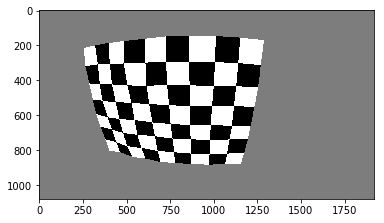

In [6]:
plt.imshow(mask)
plt.show()

In [7]:
# Import mice_video.py
from tools import mice_video as mice

SyntaxError: invalid syntax (mice_video.py, line 122)

In [1]:
# If the program works correctly, the output image should be the same as above
test_image = mice.video_correction(np_dot_list, image_test=True)
# Show the image
plt.imshow(test_image)
plt.show()

NameError: name 'mice' is not defined

Success, moving on to correctly returning the values K, D, and DIM

In [10]:
K, D, DIM = mice.video_correction(np_dot_list, image_test=False)

error: /Users/travis/miniconda3/conda-bld/opencv_1489542914304/work/opencv-3.1.0/modules/imgproc/src/cornersubpix.cpp:56: error: (-215) count >= 0 in function cornerSubPix
